In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 2: Load the dataset
df = pd.read_csv("Zoo.csv")
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
#Summary Statistics
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


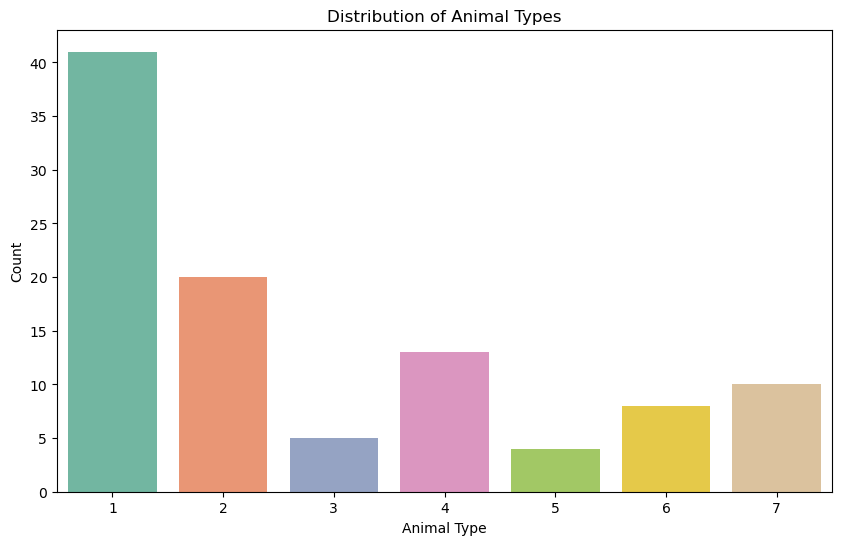

In [5]:
#Step 3:-Analyse the data using the visualizations

# A:-Class Distribution (Animal Types)
#Visualize the number of animals per type:

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

#This shows how many animals belong to each class (e.g., mammals, birds, reptiles).

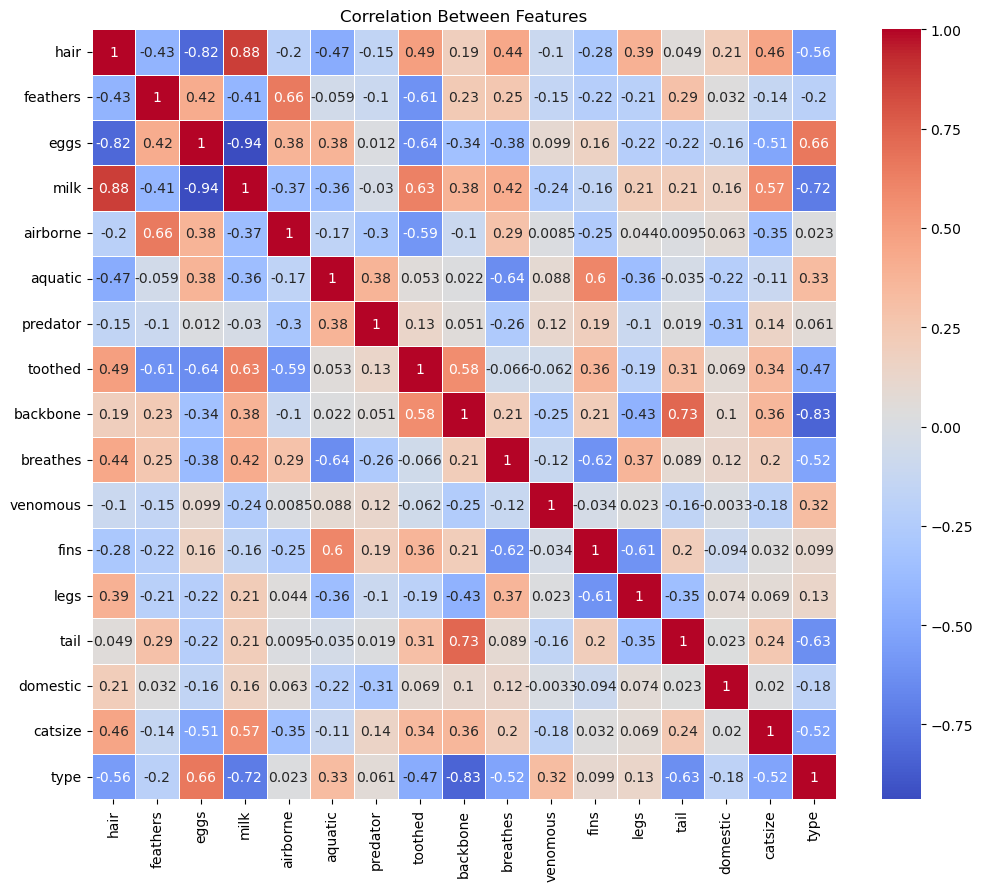

In [6]:
#B:- Feature Correlation Heatmap
#Check how features are related to each other:

plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()

#This helps in identifying redundant features and relationships between binary attributes.



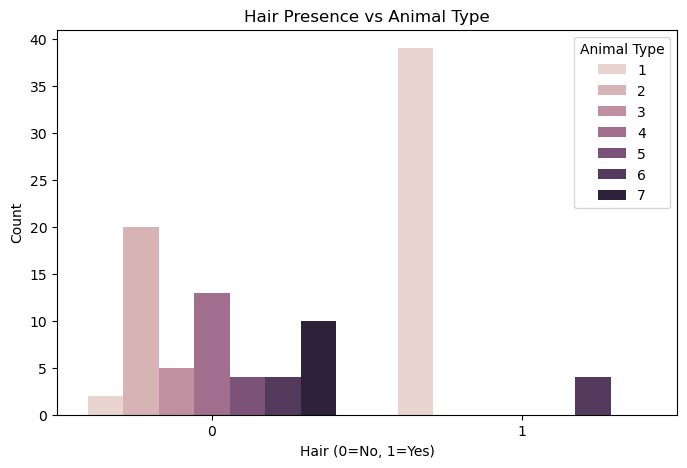

In [7]:
#C:- Barplots of Key Features by Type
# let's visualize whether animals with hair are mostly of a specific type:

plt.figure(figsize=(8, 5))
sns.countplot(x='hair', hue='type', data=df)
plt.title('Hair Presence vs Animal Type')
plt.xlabel('Hair (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Animal Type')
plt.show()



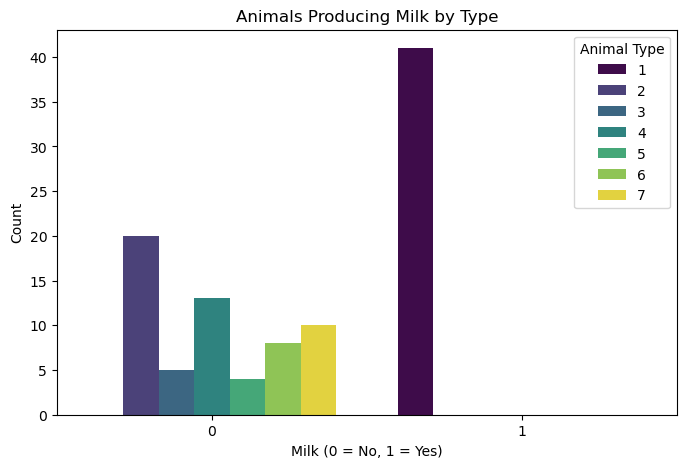

In [8]:
#D:- Count of Animals Having Milk vs Type

plt.figure(figsize=(8, 5))
sns.countplot(x='milk', hue='type', data=df, palette='viridis')
plt.title('Animals Producing Milk by Type')
plt.xlabel('Milk (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Animal Type')
plt.show()

#This helps identify if milk-producing animals (usually mammals) belong to a specific type.



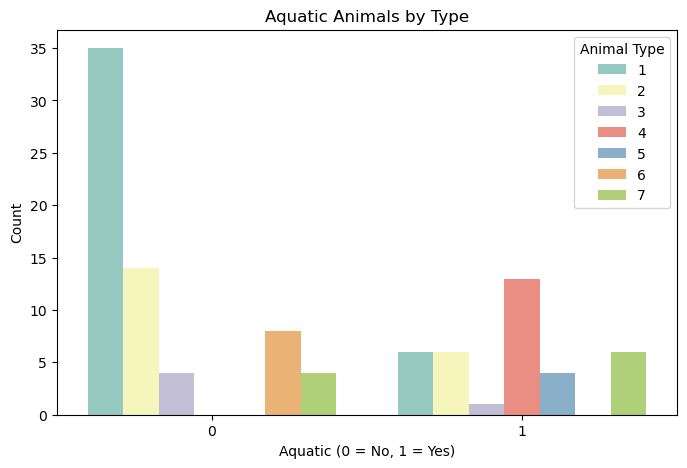

In [9]:
#E:- Count of Aquatic Animals by Type

plt.figure(figsize=(8, 5))
sns.countplot(x='aquatic', hue='type', data=df, palette='Set3')
plt.title('Aquatic Animals by Type')
plt.xlabel('Aquatic (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Animal Type')
plt.show()

#This shows which animal types are aquatic (e.g., fish, amphibians).

In [10]:
#Step4:- Preprocess the data by handling missing values & Outliers

# Check for missing values
df.isnull().sum()


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [11]:
#There is no missing values in zoo dataset.

In [12]:
#Drop Irrelevant Columns

#animal name is not useful for classification,we'll remove it:

df = df.drop('animal name', axis=1)


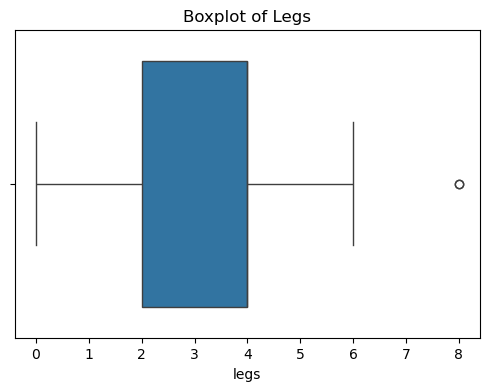

In [13]:
#Check for Outliers

#Since most features in the Zoo dataset are binary (0 or 1), traditional outlier detection doesn’t apply.
#However, for numeric columns like legs and tail, we can visualize them.

#Boxplot for legs

plt.figure(figsize=(6, 4))
sns.boxplot(x='legs', data=df)
plt.title('Boxplot of Legs')
plt.show()


In [14]:
#Step5:- # Features and target
X = df.drop('type', axis=1)
y = df['type']

In [15]:
#Train-Test Split (80% train, 20% test)

# Step 3: Train-Test Split (as DataFrames to preserve index)
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)
X_scaled_full = scaler.fit_transform(X)



In [17]:
#Step6:- Find Best K Using Manhattan Distance

error_rates = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)


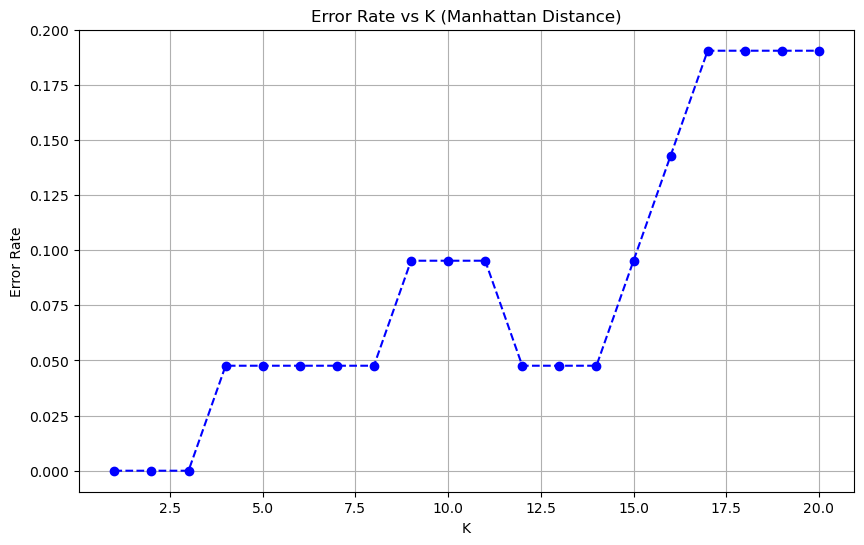

In [18]:
# Plot Error Rate vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='blue')
plt.title('Error Rate vs K (Manhattan Distance)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [19]:
#Step7:- Train the final model with K=5 and Manhattan distance

#K=5 is chosen because it provides low and stable error, avoiding overfitting.
#It balances bias and variance, offering better generalization to unseen data.

knn_final = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_final.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='manhattan')

In [20]:
#Step8:- Predict and evaluate

y_pred = knn_final.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(" Final Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Final Model Evaluation
Accuracy: 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


In [21]:
#A 95% accuracy shows the KNN model with K=5 and Manhattan distance is performing very well, 
#making it highly reliable for classifying animal types.

In [22]:
#  PCA for Visualization

#PCA reduces high-dimensional data (like 16 features) to 2 dimensions for easy visualization.
#i use it to plot KNN decision boundaries and understand class separation visually.

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled_full)

# Align PCA output using original indices
X_train_pca = X_reduced[X_train_df.index]
X_test_pca = X_reduced[X_test_df.index]

# Train model on PCA-reduced training set
knn_pca = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_pca.fit(X_train_pca, y_train)


KNeighborsClassifier(metric='manhattan')

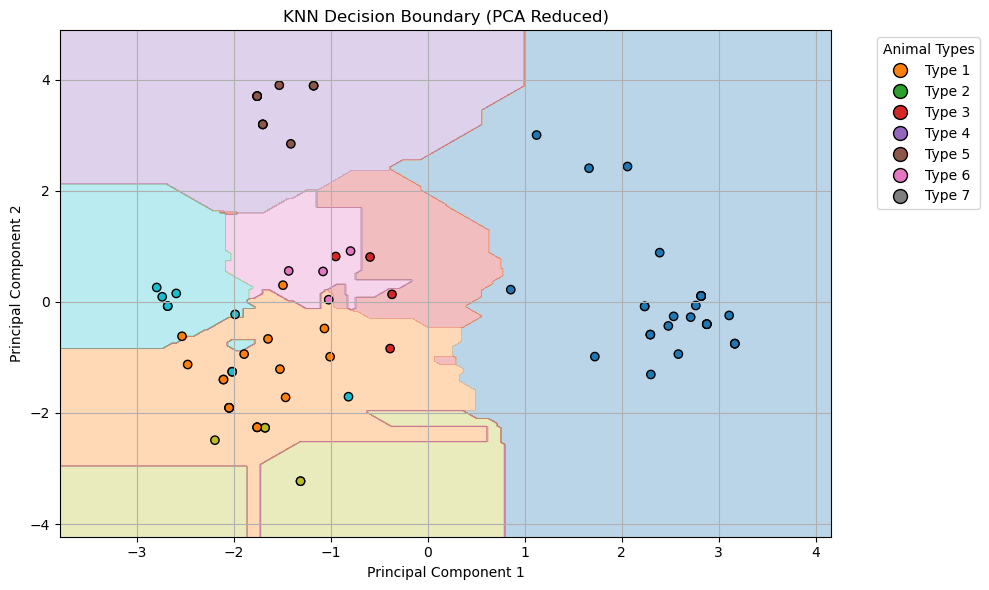

In [23]:
# Step 9: Decision Boundary Plot with Legend
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='tab10')

# Add legend for class labels
unique_classes = np.unique(y_train)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Type {cls}',
           markerfacecolor=plt.cm.tab10(cls / 10), markersize=10, markeredgecolor='k')
    for cls in unique_classes
]
plt.legend(handles=legend_elements, title="Animal Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("KNN Decision Boundary (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


### Interview Questions